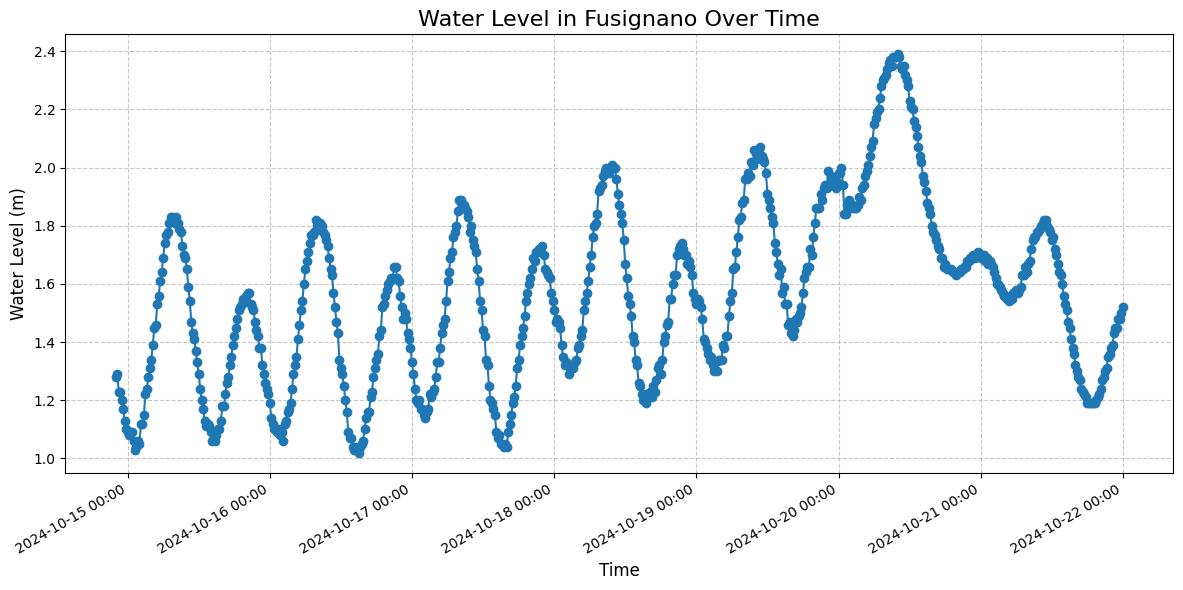

{'start_time': Timestamp('2024-10-14 22:00:00+0000', tz='UTC'), 'end_time': Timestamp('2024-10-22 00:00:00+0000', tz='UTC'), 'duration': Timedelta('7 days 02:00:00'), 'min_level': 1.02, 'max_level': 2.39}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def load_hydrometric_data(file_path):
    """
    Load hydrometric data from a CSV file.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Loaded and processed data
    """
    # Load the CSV file
    df = pd.read_csv(file_path, parse_dates=['Inizio validità (UTC)', 'Fine validità (UTC)'])
    
    # Rename columns for easier handling
    df = df.rename(columns={
        'Inizio validità (UTC)': 'start_time',
        'Fine validità (UTC)': 'end_time',
        'Livello idrometrico (M)': 'water_level'
    })
    
    return df

def plot_water_levels(df, location):
    """
    Plot water levels over time.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the hydrometric data
    location (str): Name of the location for the plot title
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['start_time'], df['water_level'], marker='o')
    
    plt.title(f'Water Level in {location} Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Water Level (m)', fontsize=12)
    
    plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d %H:%M"))
    plt.gcf().autofmt_xdate()
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def analyze_data(df):
    """
    Perform basic analysis on the hydrometric data.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the hydrometric data
    
    Returns:
    dict: Analysis results
    """
    analysis = {
        'start_time': df['start_time'].min(),
        'end_time': df['start_time'].max(),
        'duration': df['start_time'].max() - df['start_time'].min(),
        'min_level': df['water_level'].min(),
        'max_level': df['water_level'].max()
    }
    return analysis

def main():
    file_path = "C:\\Users\\amixg\\Downloads\\import.txt"
    location = "Fusignano"
    
    # Load the data
    df = load_hydrometric_data(file_path)
    
    # Plot the water levels
    plot_water_levels(df, location)
    
    # Perform analysis
    analysis = analyze_data(df)
    print(analysis)

if __name__ == "__main__":
    main()